## Descripción del dataset:

1. **CRIM**:   Crimen per cápita por ciudad

2. **ZN**:      Proporción de zona marcada como residencial para espacios superiores 25,000 sq.ft.

3. **INDUS**:   Proporción de acres comerciales no minoristas por ciudad

4. **CHAS**:     Variable Charles River dummy (= 1 si el trazado limita con el río; 0 otro)

5. **NOX**:      Concentración de óxidos nítricos (partes por 10 millones)

6. **RM**:       Número medio de habitaciones por vivienda

7. **AGE**:      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940

8. **DIS**:      Distancias ponderadas a cinco centros de empleo de Boston

9. **RAD**:      Índice de accesibilidad a las autopistas radiales

10. **TAX**      Tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares

11. **PTRATIO**: Ratio alumnos-profesor por ciudad

12. **B**:       1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad

13. **LSTAT**:    % estatus inferior de la población

14. **PRICE**:    Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares



In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
boston = pd.read_csv("boston_house_prices.csv", header = 1)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


El dataset cuenta con 506 instancias y 14 variables

In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [15]:
boston.rename(columns={'MEDV': 'PRICE'}, inplace=True)
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


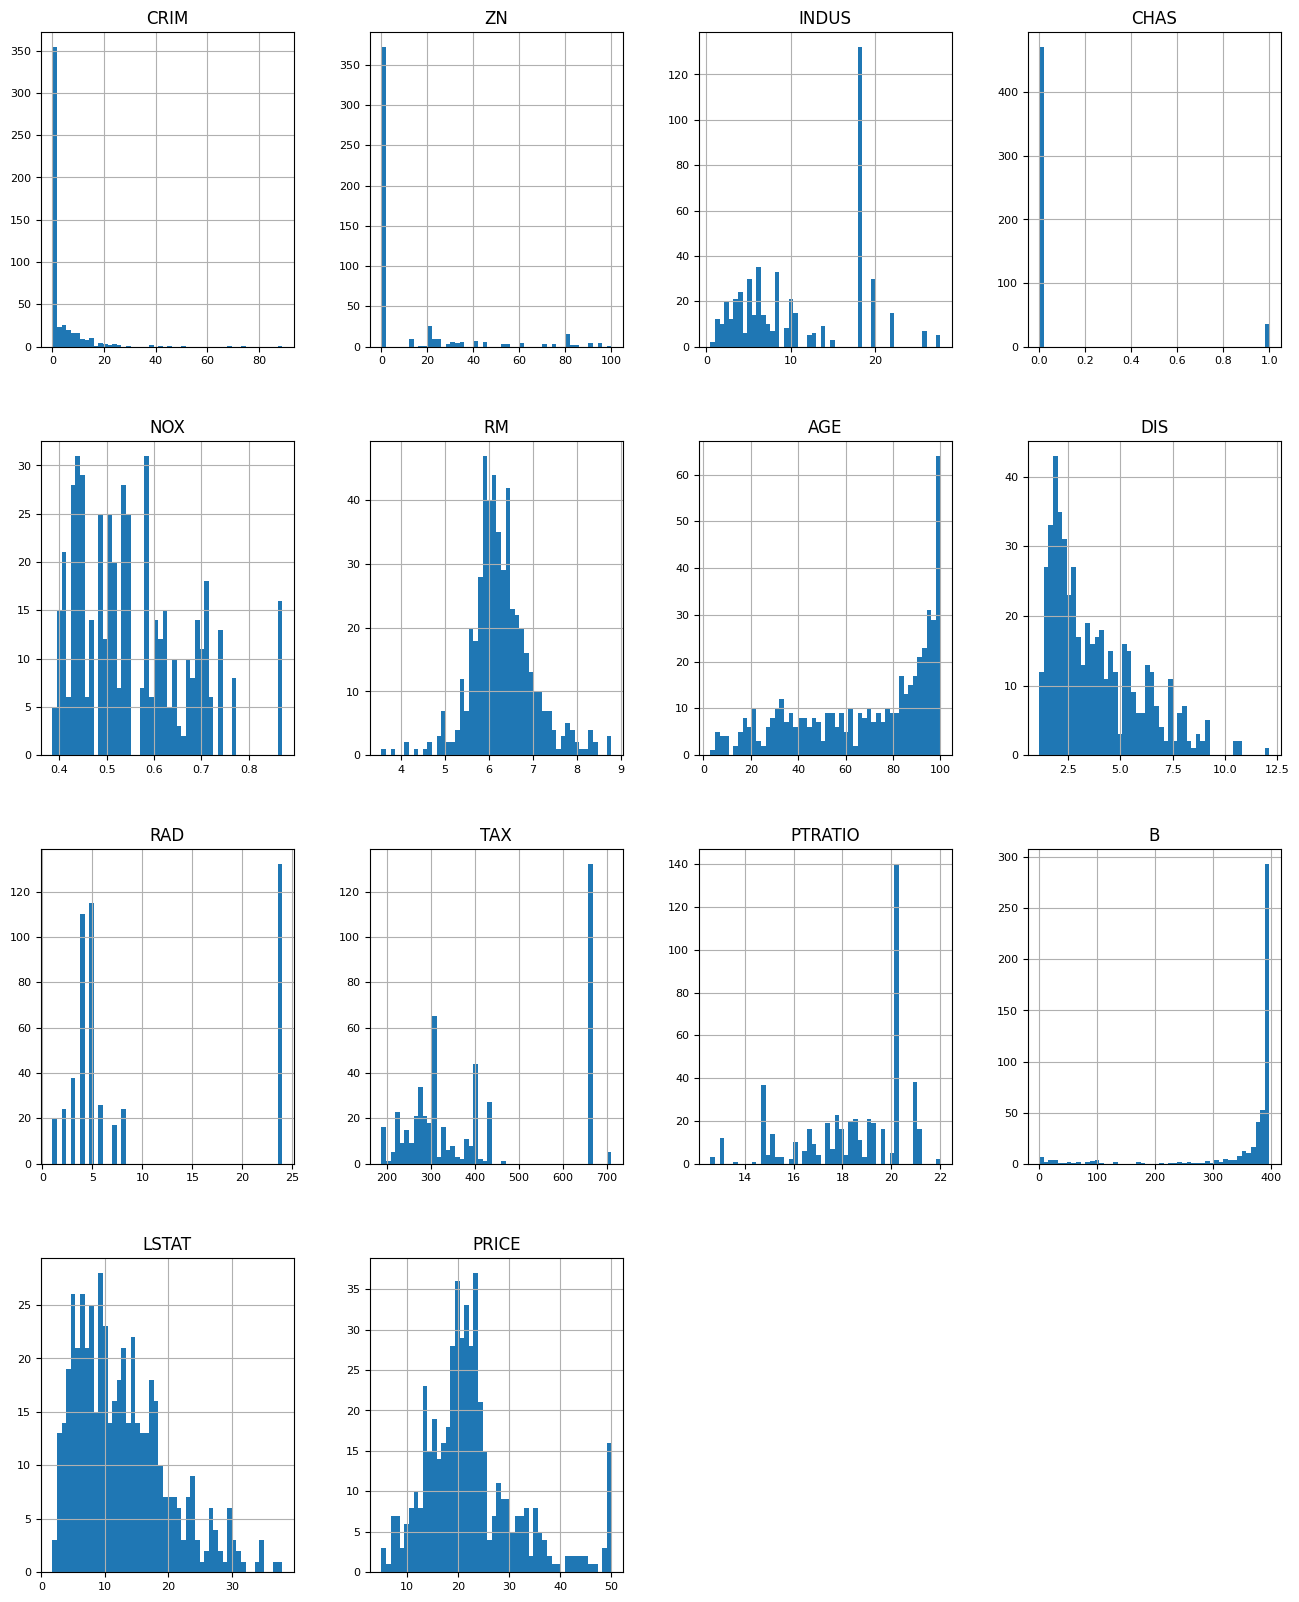

In [17]:
boston.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<Axes: >

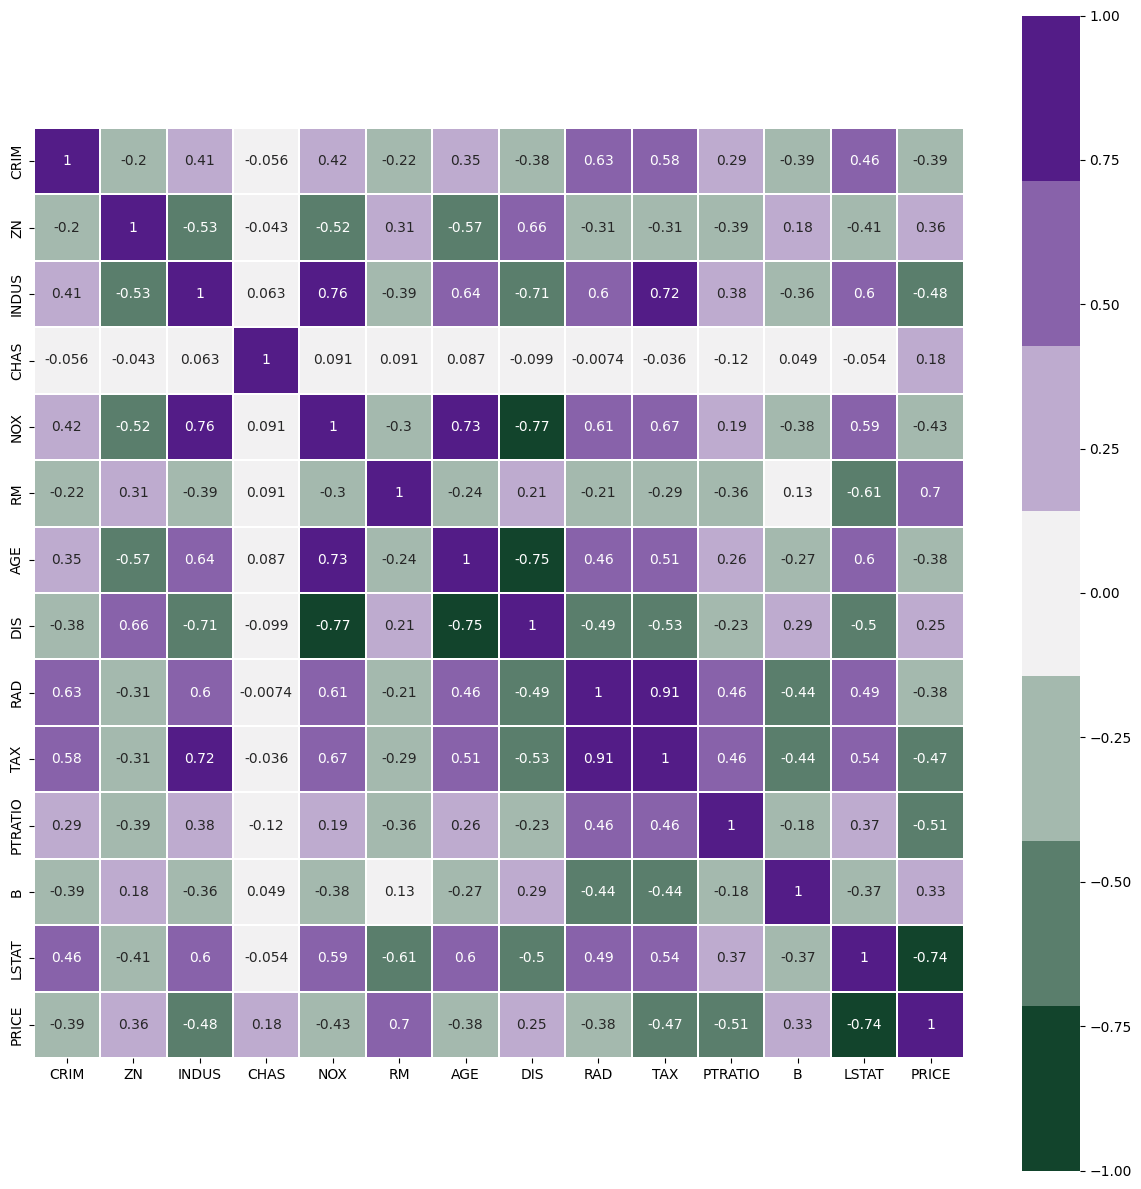

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(boston.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)

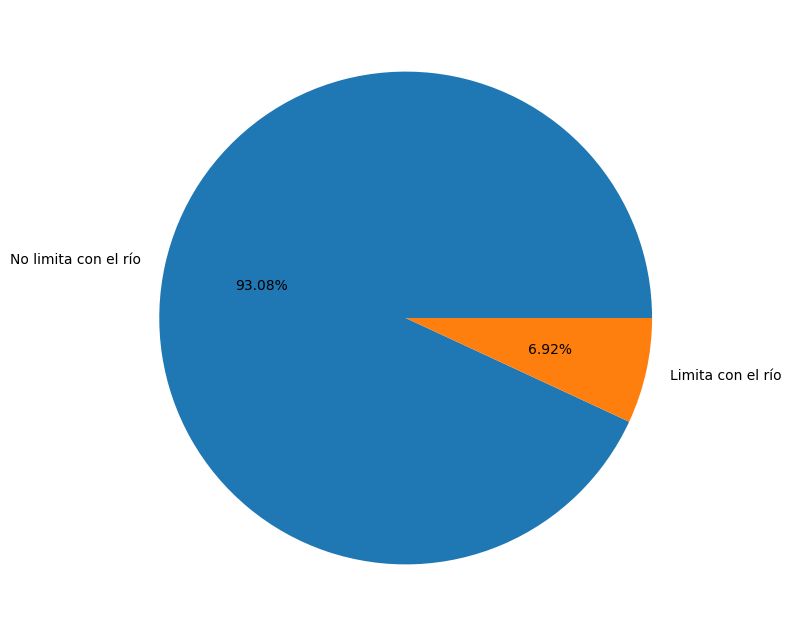

In [35]:
plt.figure(figsize=(8,8))
plt.pie(boston["CHAS"].value_counts(),
        labels=['No limita con el río', 'Limita con el río'],
        autopct='%1.2f%%')
p=plt.gcf()

Tal y como muestra el grafico, la mayoria de las casas en Boston no se encuentran cercanas al rio. Así mismo, la correlacion baja entre la proximidad de las viviendas al rio y el precio medio nos indica que, a diferencia de otras ciudades donde dicha cercania aumentaria el valor del inmueble, en Boston no lo hace. 

<Axes: xlabel='RM', ylabel='PRICE'>

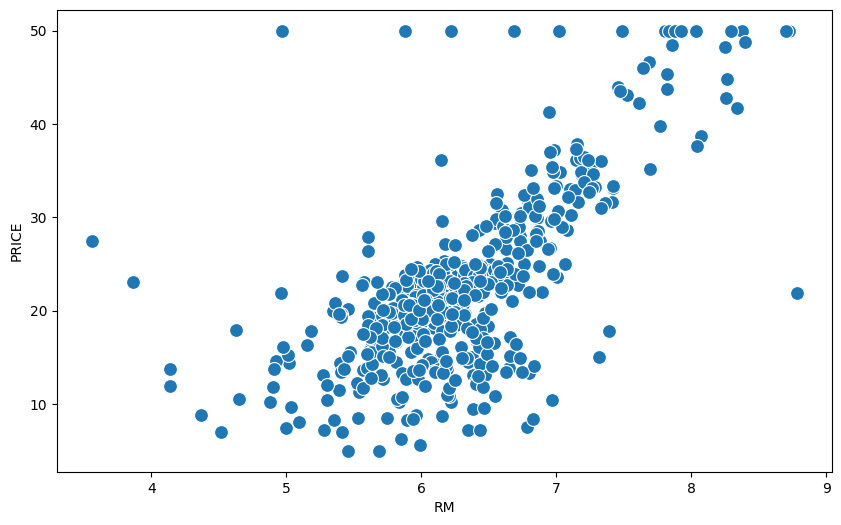

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=boston['RM'],
                y=boston['PRICE'],
               s=100)

De media, en Boston viven 6 personas por vivienda, la relacion positiva con el precio refleja que las viviendas con un mayor número de habitaciones tienden a tener un valor más alto. Esto podría deberse a que las viviendas con más habitaciones suelen ser más grandes y pueden estar ubicadas en vecindarios más exclusivos. 

{'whiskers': [<matplotlib.lines.Line2D at 0x145979370>,
 'caps': [<matplotlib.lines.Line2D at 0x1459789e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14597b680>],
 'medians': [<matplotlib.lines.Line2D at 0x14597a390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1459781d0>],
 'means': []}

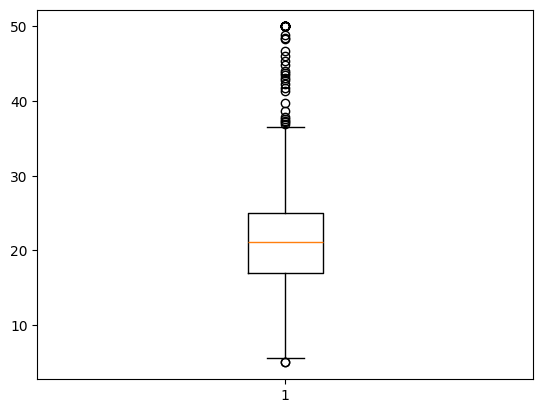

In [21]:
plt.boxplot(boston["PRICE"])

La correlacion positiva entre INDUS Y NOX indica que en las zonas dedicadas a usos industriales o comerciales que no incluyen el comercio minorista la concentracion de oxidos nitricos. 